Can we create a model that predicts whether or not a team won a game based on the team stats w/o comparing it to the opponents stats?

Are there certain stats that teams should place more emphasis on to win?

Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

Kaggle Dataset from https://www.kaggle.com/nathanlauga/nba-games
Used game_details file

In [2]:
data = pd.read_csv(r"C:\Users\jorda\OneDrive\Desktop\Projects\Data Analysis\TeamWInPrediction\games_details.csv")

Get all columns in dataset

In [3]:
df = pd.DataFrame(data)
df = df.reset_index()
df.columns


Index(['index', 'GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY',
       'PLAYER_ID', 'PLAYER_NAME', 'START_POSITION', 'COMMENT', 'MIN', 'FGM',
       'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS',
       'PLUS_MINUS'],
      dtype='object')

In [4]:
df.head(20)

,index,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,0,42000102,1610612764,WAS,Washington,203078,Bradley Beal,F,NaN,34:36:00,...,0.0,4.0,4.0,3.0,1.0,0.0,1.0,0.0,33.0,-22.0
1,1,42000102,1610612764,WAS,Washington,1629060,Rui Hachimura,F,NaN,25:50:00,...,2.0,5.0,7.0,1.0,0.0,0.0,3.0,4.0,11.0,-6.0
2,2,42000102,1610612764,WAS,Washington,203458,Alex Len,C,NaN,12:11,...,3.0,2.0,5.0,0.0,1.0,0.0,0.0,2.0,6.0,-11.0
3,3,42000102,1610612764,WAS,Washington,203526,Raul Neto,G,NaN,19:19,...,1.0,2.0,3.0,1.0,0.0,0.0,0.0,2.0,4.0,-17.0
4,4,42000102,1610612764,WAS,Washington,201566,Russell Westbrook,G,NaN,29:07:00,...,2.0,4.0,6.0,11.0,0.0,0.0,4.0,0.0,10.0,-16.0
5,5,42000102,1610612764,WAS,Washington,202722,Davis Bertans,NaN,NaN,23:43,...,0.0,2.0,2.0,0.0,0.0,0.0,0.0,6.0,0.0,-11.0
6,6,42000102,1610612764,WAS,Washington,202397,Ish Smith,NaN,NaN,23:20,...,0.0,1.0,1.0,3.0,0.0,0.0,1.0,1.0,10.0,-10.0
7,7,42000102,1610612764,WAS,Washington,1629655,Daniel Gafford,NaN,NaN,20:00,...,4.0,2.0,6.0,1.0,1.0,1.0,1.0,1.0,11.0,-1.0
8,8,42000102,1610612764,WAS,Washington,1628990,Chandler Hutchison,NaN,NaN,16:29,...,0.0,2.0,2.0,1.0,0.0,0.0,1.0,1.0,4.0,-17.0
9,9,42000102,1610612764,WAS,Washington,201577,Robin Lopez,NaN,NaN,10:15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,-12.0


In [5]:
df.dtypes

index                  int64
GAME_ID                int64
TEAM_ID                int64
TEAM_ABBREVIATION     object
TEAM_CITY             object
PLAYER_ID              int64
PLAYER_NAME           object
START_POSITION        object
COMMENT               object
MIN                   object
FGM                  float64
FGA                  float64
FG_PCT               float64
FG3M                 float64
FG3A                 float64
FG3_PCT              float64
FTM                  float64
FTA                  float64
FT_PCT               float64
OREB                 float64
DREB                 float64
REB                  float64
AST                  float64
STL                  float64
BLK                  float64
TO                   float64
PF                   float64
PTS                  float64
PLUS_MINUS           float64
dtype: object

In [6]:
df.describe()

,index,GAME_ID,TEAM_ID,PLAYER_ID,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
count,615626.000000,6.156260e+05,6.156260e+05,6.156260e+05,515577.000000,515577.000000,515577.000000,515577.000000,515577.000000,515577.000000,...,515577.000000,515577.000000,515577.000000,515577.000000,515577.000000,515577.000000,515577.000000,515577.000000,515577.000000,491916.000000
mean,307812.500000,2.161226e+07,1.610613e+09,3.312993e+05,3.575898,7.879867,0.415921,0.747698,2.098759,0.196683,...,1.030374,3.026037,4.056411,2.091259,0.723211,0.462284,1.326853,2.011872,9.644098,-0.000362
std,177716.062747,5.548896e+06,8.651776e+00,7.523708e+06,3.017828,5.653108,0.251533,1.200864,2.510032,0.289237,...,1.403506,2.684467,3.487935,2.470334,0.974858,0.867013,1.402367,1.503917,8.035642,10.602770
min,0.000000,1.030000e+07,1.610613e+09,1.500000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-57.000000
25%,153906.250000,2.060092e+07,1.610613e+09,2.412000e+03,1.000000,3.000000,0.250000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,-7.000000
50%,307812.500000,2.120012e+07,1.610613e+09,2.008260e+05,3.000000,7.000000,0.429000,0.000000,1.000000,0.000000,...,1.000000,2.000000,3.000000,1.000000,0.000000,0.000000,1.000000,2.000000,8.000000,0.000000
75%,461718.750000,2.160122e+07,1.610613e+09,2.030820e+05,5.000000,11.000000,0.571000,1.000000,3.000000,0.375000,...,2.000000,4.000000,6.000000,3.000000,1.000000,1.000000,2.000000,3.000000,14.000000,6.000000
max,615625.000000,5.200021e+07,1.610613e+09,1.962938e+09,28.000000,50.000000,1.000000,14.000000,24.000000,1.000000,...,18.000000,25.000000,31.000000,25.000000,10.000000,12.000000,12.000000,15.000000,81.000000,57.000000


Lets also change the data types of the given ids since we will not be using them to do any math related tasks

In [7]:
df['GAME_ID'] = df['GAME_ID'].astype(str)
df['TEAM_ID'] = df['TEAM_ID'].astype(str)
df['PLAYER_ID'] = df['PLAYER_ID'].astype(str)


Lets check and see if we have any null values

In [8]:
df.isnull().sum()

index                     0
GAME_ID                   0
TEAM_ID                   0
TEAM_ABBREVIATION         0
TEAM_CITY                 0
PLAYER_ID                 0
PLAYER_NAME               0
START_POSITION       379831
COMMENT              515578
MIN                  100049
FGM                  100049
FGA                  100049
FG_PCT               100049
FG3M                 100049
FG3A                 100049
FG3_PCT              100049
FTM                  100049
FTA                  100049
FT_PCT               100049
OREB                 100049
DREB                 100049
REB                  100049
AST                  100049
STL                  100049
BLK                  100049
TO                   100049
PF                   100049
PTS                  100049
PLUS_MINUS           123710
dtype: int64

There are some players who did not play so lets delete them  from the dataset. We can also drop the comment, MIN, and Start position columns as well!

In [9]:
df = df[df['PLUS_MINUS'].notna()]
del df["COMMENT"]
del df["START_POSITION"]
del df['MIN']

In [10]:
df.isnull().sum()

index                0
GAME_ID              0
TEAM_ID              0
TEAM_ABBREVIATION    0
TEAM_CITY            0
PLAYER_ID            0
PLAYER_NAME          0
FGM                  0
FGA                  0
FG_PCT               0
FG3M                 0
FG3A                 0
FG3_PCT              0
FTM                  0
FTA                  0
FT_PCT               0
OREB                 0
DREB                 0
REB                  0
AST                  0
STL                  0
BLK                  0
TO                   0
PF                   0
PTS                  0
PLUS_MINUS           0
dtype: int64

In [11]:
#grouped rows by teamid and game id
teamdf = df.groupby(['GAME_ID', 'TEAM_ID']).sum().reset_index()



#'FG2M', 'FG2A', 'FG2_PCT' #These values were incorrect as they should not be summed
teamdf[['FG3_PCT']] = teamdf['FG3M'].div(teamdf['FG3A'].values,axis=0)
teamdf[['FG_PCT']] = teamdf['FGM'].div(teamdf['FGA'].values,axis=0)
teamdf[['FT_PCT']] = teamdf['FTM'].div(teamdf['FTA'].values,axis=0)


teamdf = teamdf.groupby(['GAME_ID', 'TEAM_ID']).sum().reset_index()
#add point differential to columns
teamdf['PTDIFFERENTIAL'] = teamdf['PLUS_MINUS']/5

Lets look at correlation as I expect multicollinearity

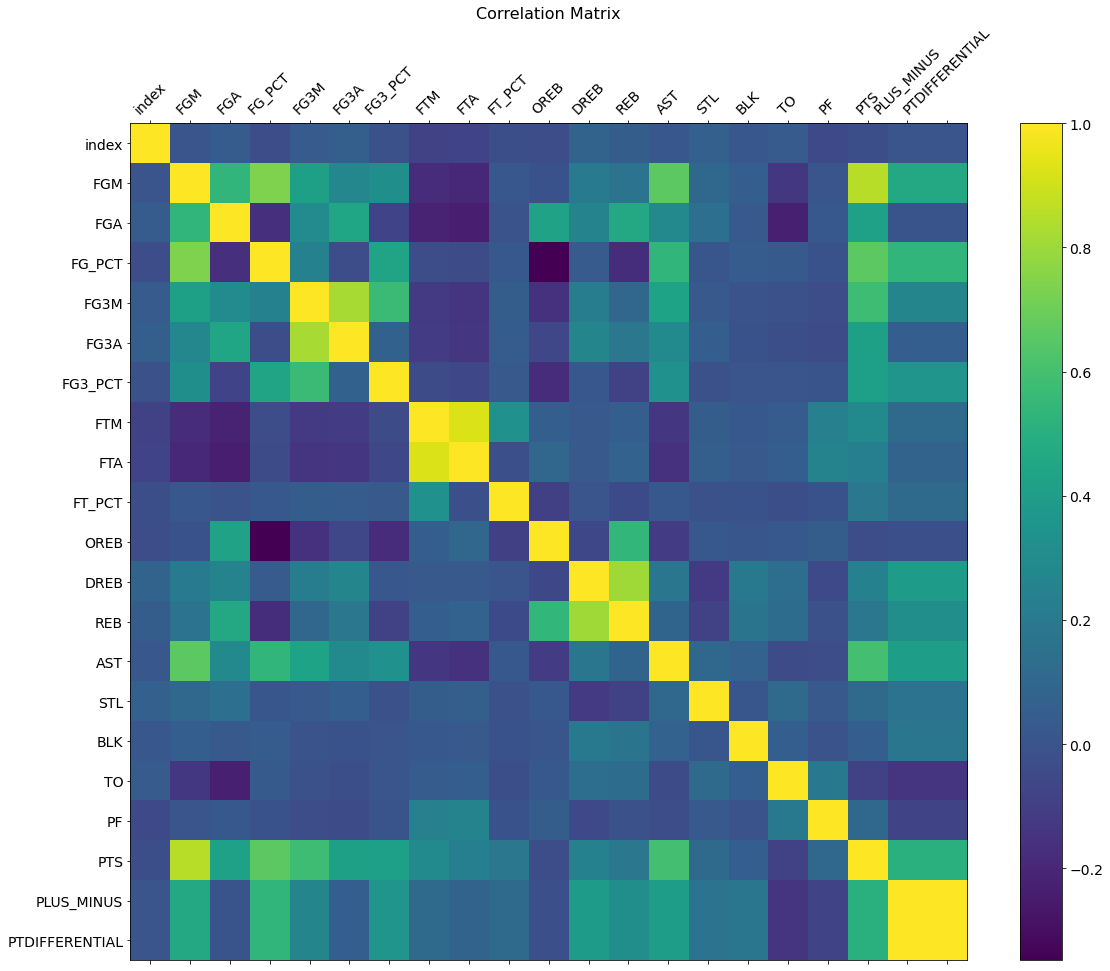

In [12]:
f = plt.figure(figsize=(19, 15))
plt.matshow(teamdf.corr(), fignum=f.number)
plt.xticks(range(teamdf.select_dtypes(['number']).shape[1]), teamdf.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(teamdf.select_dtypes(['number']).shape[1]), teamdf.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [13]:
#As expected there is some high correlation
#as expected there are several highly correlated variables
#since this is the case 
#we will drop the points column and add the needed columns for 2 pts shots to replace the fgm section
#We will also drop the rebound column as that is dependent on the oreb and dreb columns
#Makes and percentages are also correlated

teamdf['FG2A'] = teamdf['FGA']-teamdf['FG3A']
teamdf['FG2M'] = teamdf['FGM']-teamdf['FG3M']
teamdf['FG2_PCT'] = teamdf['FG2M']/teamdf['FG2A']


del teamdf["FGM"]
del teamdf["FGA"]
del teamdf['FG_PCT']

del teamdf['FG2M']
del teamdf['FG3M']

del teamdf['FTM']

del teamdf['PTS']
del teamdf['REB']

#del teamdf['PLAYER_ID']

In [14]:

corr = teamdf.corr()
corr.style.background_gradient(cmap='coolwarm')


,index,FG3A,FG3_PCT,FTA,FT_PCT,OREB,DREB,AST,STL,BLK,TO,PF,PLUS_MINUS,PTDIFFERENTIAL,FG2A,FG2_PCT
index,1.000000,0.060876,-0.011780,-0.076614,-0.024641,-0.031381,0.078987,0.018025,0.063328,0.016361,0.041445,-0.051283,0.006720,0.006720,-0.018091,-0.011322
FG3A,0.060876,1.000000,0.070648,-0.135997,0.042681,-0.062890,0.267735,0.292751,0.053120,-0.010275,-0.022948,-0.032398,0.054685,0.054685,-0.589477,0.204041
FG3_PCT,-0.011780,0.070648,1.000000,-0.055662,0.027219,-0.175914,0.018508,0.334458,-0.015321,0.009087,0.005095,0.000813,0.355876,0.355876,-0.140901,0.016629
FTA,-0.076614,-0.135997,-0.055662,1.000000,-0.018672,0.094518,0.026396,-0.153868,0.059150,0.030713,0.057178,0.255715,0.081788,0.081788,-0.075346,-0.032990
FT_PCT,-0.024641,0.042681,0.027219,-0.018672,1.000000,-0.091282,0.007581,0.021273,-0.014452,-0.007841,-0.026511,-0.005962,0.117838,0.117838,-0.042882,0.023278
OREB,-0.031381,-0.062890,-0.175914,0.094518,-0.091282,1.000000,-0.054985,-0.113347,0.025249,0.014947,0.023427,0.047433,-0.020499,-0.020499,0.450366,-0.332082
DREB,0.078987,0.267735,0.018508,0.026396,0.007581,-0.054985,1.000000,0.179583,-0.116793,0.195266,0.136611,-0.048263,0.395364,0.395364,-0.037821,0.096643
AST,0.018025,0.292751,0.334458,-0.153868,0.021273,-0.113347,0.179583,1.000000,0.102557,0.077488,-0.042520,-0.027959,0.406589,0.406589,-0.029582,0.464154
STL,0.063328,0.053120,-0.015321,0.059150,-0.014452,0.025249,-0.116793,0.102557,1.000000,0.012942,0.118733,0.027116,0.167197,0.167197,0.075284,0.027063
BLK,0.016361,-0.010275,0.009087,0.030713,-0.007841,0.014947,0.195266,0.077488,0.012942,1.000000,0.057162,-0.000556,0.182040,0.182040,0.035345,0.038880


Lets create a result column for the winners and losers based on point differential

In [15]:
teamdf.loc[(teamdf.PTDIFFERENTIAL > 0), 'RESULT'] = 'W'

teamdf.loc[(teamdf.PTDIFFERENTIAL < 0), 'RESULT'] = 'L'
teamdf = teamdf.reset_index()

Lets explore stats in boxplot

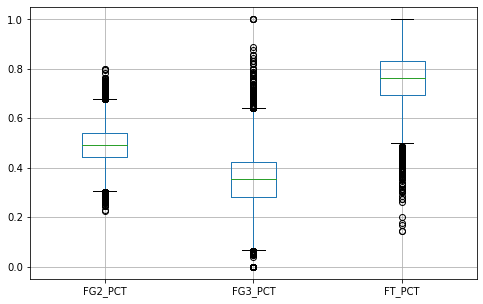

In [16]:
plt.figure(figsize=(8,5))

boxplot = teamdf.boxplot(column=[ 'FG2_PCT','FG3_PCT', 'FT_PCT'])

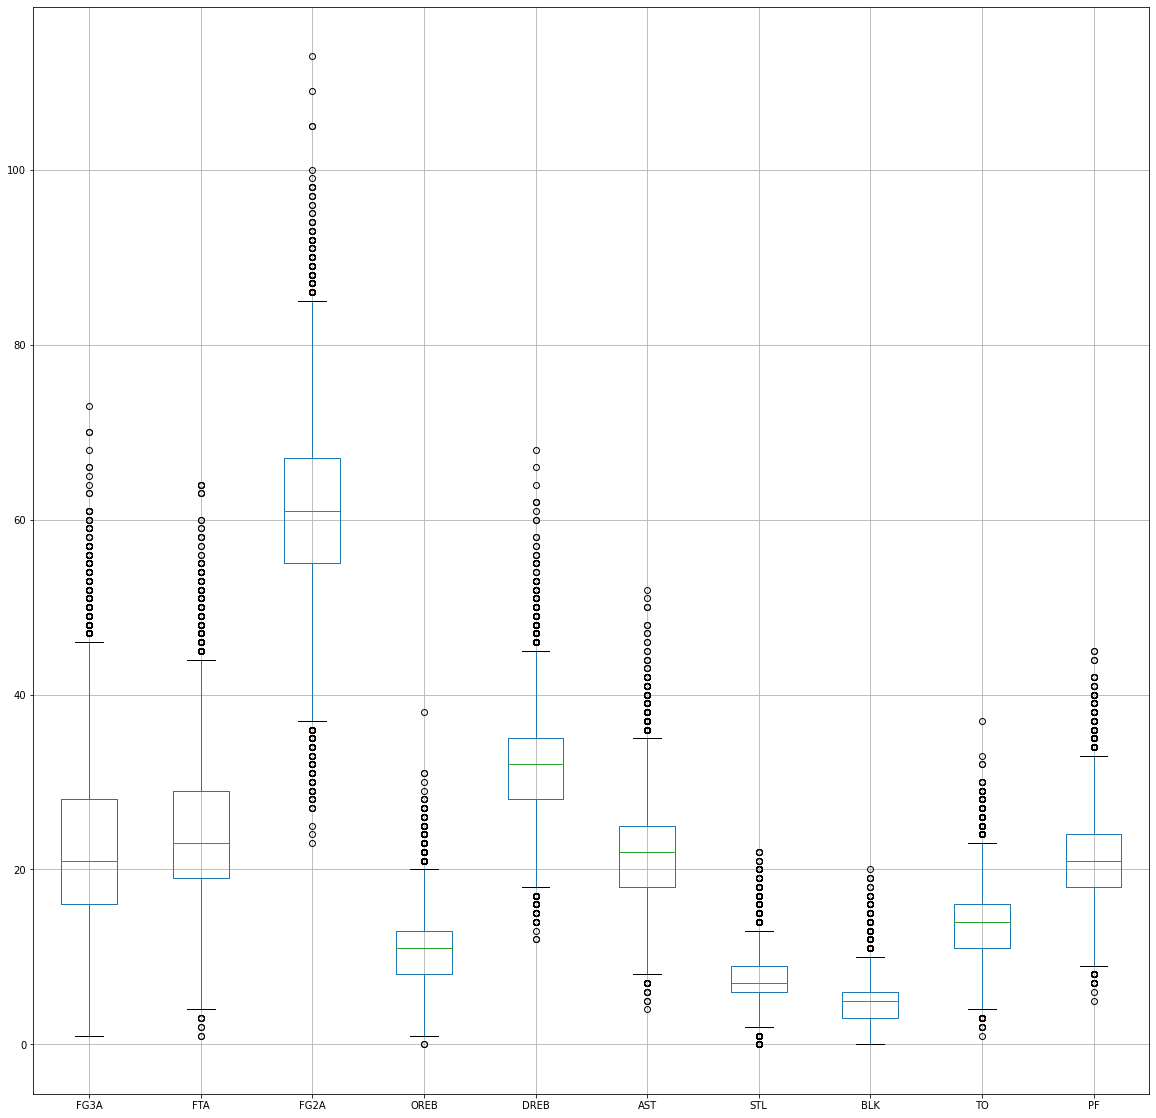

In [17]:
plt.figure(figsize=(20,20))
wanted_columns = ['FG3A', 'FTA','FG2A',
        'OREB', 'DREB', 'AST', 'STL', 'BLK', 'TO', 'PF']
boxplot = teamdf[wanted_columns].boxplot()

Histogram distribution of team stats 

array([[<AxesSubplot:title={'center':'FG3A'}>,
        <AxesSubplot:title={'center':'FTA'}>,
        <AxesSubplot:title={'center':'FG2A'}>],
       [<AxesSubplot:title={'center':'OREB'}>,
        <AxesSubplot:title={'center':'DREB'}>,
        <AxesSubplot:title={'center':'AST'}>],
       [<AxesSubplot:title={'center':'STL'}>,
        <AxesSubplot:title={'center':'BLK'}>,
        <AxesSubplot:title={'center':'TO'}>],
       [<AxesSubplot:title={'center':'PF'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

<Figure size 1440x1440 with 0 Axes>

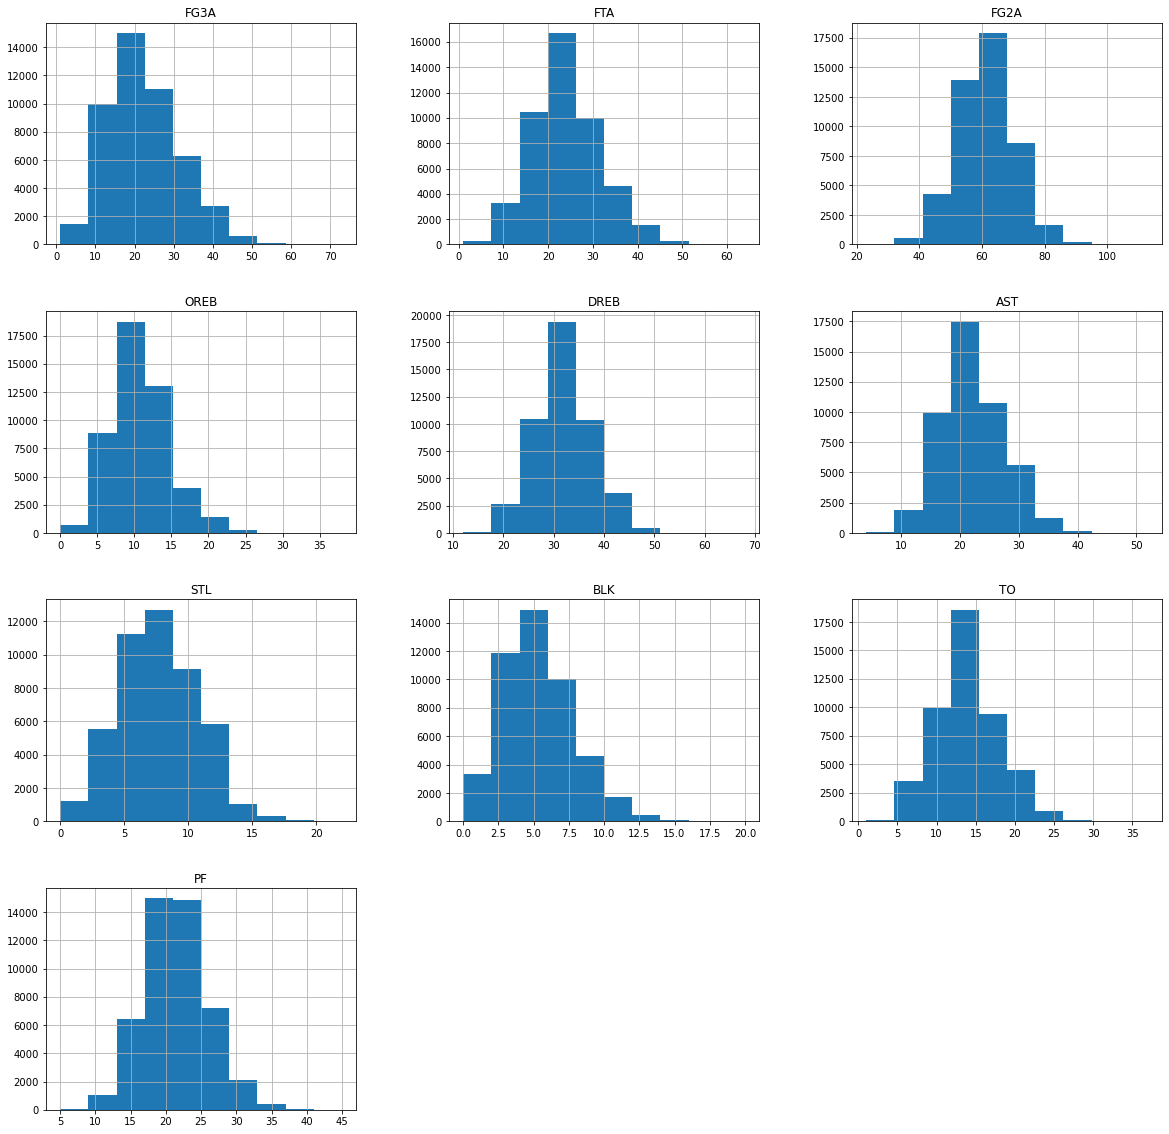

In [18]:
plt.figure(figsize=(20,20))

wanted_columns = ['FG3A', 'FTA','FG2A',
        'OREB', 'DREB', 'AST', 'STL', 'BLK', 'TO', 'PF']

teamdf[wanted_columns].hist(bins=10,figsize=(20,20))


Lets make logistic regression to classify if a team wins or losses based on game stats

In [47]:
teamdf['RESULT'].replace({'W':1,'L':'0'},inplace = True)

Lets include team city to see if team city is significant/
More specifically to see if certain statlines signify a win for certain teams

In [20]:
teamdf['TEAM_CITY'] = df['TEAM_CITY']

In [21]:
#We will also drop ptdifferential and plus minus as this spoils the outcome of the game
new_teamdf = teamdf[['FG3A', 'FG3_PCT', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'FG2A', 'FG2_PCT', 'RESULT', 'TEAM_CITY']]



Lets make team city a dummy var so that we can use it in model

In [22]:
wanted_columns = ['FG3A', 'FG3_PCT', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'AST', 'STL', 'BLK', 'TO', 'PF',  'FG2A', 'FG2_PCT','TEAM_CITY']
X = pd.get_dummies(new_teamdf[wanted_columns])

In [23]:
X.head()

,FG3A,FG3_PCT,FTA,FT_PCT,OREB,DREB,AST,STL,BLK,TO,...,TEAM_CITY_Oklahoma City,TEAM_CITY_Orlando,TEAM_CITY_Philadelphia,TEAM_CITY_Phoenix,TEAM_CITY_Portland,TEAM_CITY_Sacramento,TEAM_CITY_San Antonio,TEAM_CITY_Toronto,TEAM_CITY_Utah,TEAM_CITY_Washington
0,32.0,0.437500,17.0,0.705882,10.0,32.0,19.0,6.0,6.0,19.0,...,0,0,0,0,0,0,0,0,0,1
1,15.0,0.333333,28.0,0.678571,10.0,32.0,18.0,11.0,3.0,15.0,...,0,0,0,0,0,0,0,0,0,1
2,13.0,0.384615,40.0,0.725000,13.0,32.0,18.0,6.0,4.0,27.0,...,0,0,0,0,0,0,0,0,0,1
3,18.0,0.333333,35.0,0.771429,7.0,23.0,21.0,10.0,3.0,14.0,...,0,0,0,0,0,0,0,0,0,1
4,21.0,0.380952,32.0,0.718750,12.0,28.0,18.0,8.0,7.0,19.0,...,0,0,0,0,0,0,0,0,0,1


In [24]:
y = new_teamdf['RESULT']
y=y.astype('int')

Split data 

Referenced Site
https://datascience.foundation/sciencewhitepaper/understanding-logistic-regression-with-python-practical-guide-1

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=0)
          
display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(30634, 43)

(30634,)

(16496, 43)

(16496,)

In [26]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=10000)

lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

Predict with test set

In [27]:
y_pred=lr.predict(X_test)

In [28]:
y_pred

array([0, 1, 0, ..., 1, 0, 1])

Confusion Matrix


In [29]:
import sklearn.metrics as metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[6879, 1357],
       [1382, 6878]], dtype=int64)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

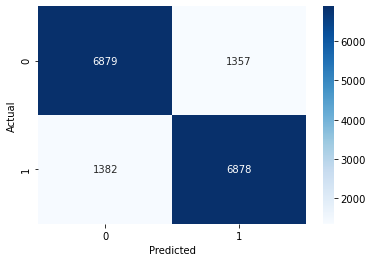

In [30]:
cnf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(cnf_matrix,annot=True,cmap='Blues',fmt='g')

In [31]:
(6879 +6878)/(1382 +1357+6879 +6878)

0.8339597478176528

In [32]:
accuracyScore = metrics.accuracy_score(y_test,y_pred)
print('Accuracy Score: ', accuracyScore)
print('Accuracy Score in Percentage :' ,int(accuracyScore*100),'%')

Accuracy Score:  0.8339597478176528
Accuracy Score in Percentage : 83 %


In [33]:
lr.coef_

array([[-1.96320344e-01,  1.00263088e+01,  3.01378728e-02,
         3.90236136e+00,  3.03790218e-01,  3.19632789e-01,
         8.93745506e-02,  3.53982393e-01,  1.06100099e-01,
        -3.02593418e-01, -5.28414740e-02, -1.62531058e-01,
         1.71828167e+01, -4.24968792e-02, -8.19455870e-02,
         2.35947301e-03, -1.24231705e-02,  9.59478134e-03,
         5.42703540e-02, -1.62498785e-01, -1.10924357e-02,
        -1.59068531e-01,  3.19578111e-03,  3.29602174e-02,
         3.48948169e-02,  9.40132768e-02,  3.26159546e-02,
        -1.21934275e-01, -7.41254150e-02,  5.87121685e-02,
         1.98368917e-04, -8.55547216e-02,  2.50397047e-02,
        -1.95596395e-01,  2.10125180e-02,  2.96375835e-02,
         1.06269719e-01, -4.54334340e-02,  3.34528150e-02,
        -5.59056516e-03, -1.91877789e-02, -6.32822391e-02,
         5.74643038e-02]])

Lets see a model without team city

In [34]:
new_teamdf = teamdf[['FG3A', 'FG3_PCT', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'FG2A', 'FG2_PCT', 'RESULT']]


In [35]:
new_teamdf.head()

,FG3A,FG3_PCT,FTA,FT_PCT,OREB,DREB,AST,STL,BLK,TO,PF,FG2A,FG2_PCT,RESULT
0,32.0,0.437500,17.0,0.705882,10.0,32.0,19.0,6.0,6.0,19.0,25.0,46.0,0.478261,1
1,15.0,0.333333,28.0,0.678571,10.0,32.0,18.0,11.0,3.0,15.0,17.0,57.0,0.456140,0
2,13.0,0.384615,40.0,0.725000,13.0,32.0,18.0,6.0,4.0,27.0,27.0,51.0,0.490196,0
3,18.0,0.333333,35.0,0.771429,7.0,23.0,21.0,10.0,3.0,14.0,31.0,57.0,0.473684,1
4,21.0,0.380952,32.0,0.718750,12.0,28.0,18.0,8.0,7.0,19.0,24.0,53.0,0.320755,0


In [36]:
wanted_columns = ['FG3A', 'FG3_PCT', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'FG2A', 'FG2_PCT']
X = pd.get_dummies(new_teamdf[wanted_columns])

In [37]:
y = new_teamdf['RESULT']
y=y.astype('int')

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
          
display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(35347, 13)

(35347,)

(11783, 13)

(11783,)

In [39]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=10000)

lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [40]:
y_pred=lr.predict(X_test)

In [41]:
import sklearn.metrics as metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[4941,  953],
       [ 971, 4918]], dtype=int64)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

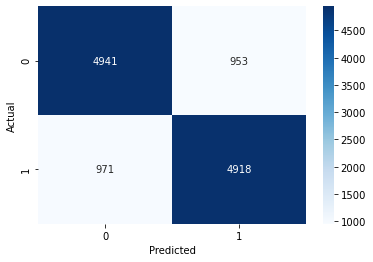

In [42]:
cnf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(cnf_matrix,annot=True,cmap='Blues',fmt='g')

In [43]:
accuracyScore = metrics.accuracy_score(y_test,y_pred)
print('Accuracy Score: ', accuracyScore)
print('Accuracy Score in Percentage :' ,int(accuracyScore*100),'%')

Accuracy Score:  0.8367139098701519
Accuracy Score in Percentage : 83 %


In [56]:
lr.coef_

array([[-0.19456767, 10.05910458,  0.03001654,  3.9793136 ,  0.30611818,
         0.31941565,  0.08806938,  0.35395845,  0.10578302, -0.30105963,
        -0.05145367, -0.1618463 , 17.29062829]])

Seeing how the accuracy scores are so similiar there may not be too much 
difference in winning statlines over time

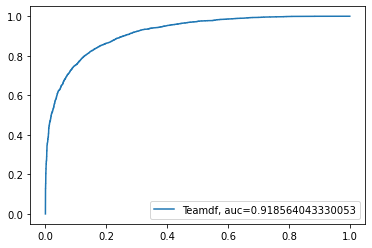

In [44]:
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Teamdf, auc="+str(auc))
plt.legend(loc=4)
plt.show()